In [450]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import copy
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance
from matplotlib import ticker
from sklearn import datasets
from sklearn.metrics import jaccard_score
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#%matplotlib widget
#%matplotlib qt

# Iris

In [451]:
iris = datasets.load_iris()
X=iris.data
Y=iris.target

metoda warda - ‘ward’ minimizes the variance of the clusters being merged.

metoda srednich polaczen - ‘average’ uses the average of the distances of each observation of the two sets.

metoda najdalszych polaczen - ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

metoda najblizszego sasiedztwa - ‘single’ uses the minimum of the distances between all observations of the two sets.

In [452]:
clustering = AgglomerativeClustering(n_clusters=3)

clustering.set_params(linkage='ward')
ward_Y=clustering.fit_predict(X)

clustering.set_params(linkage='average')
average_Y=clustering.fit_predict(X)

clustering.set_params(linkage='complete')
complete_Y=clustering.fit_predict(X)

clustering.set_params(linkage='single')
single_Y=clustering.fit_predict(X)

# permutations

In [453]:
def find_perm(clusters, Y_real, Y_pred):
    perm=[]
    for i in range(clusters):
        idx = Y_pred == i
        new_label=scipy.stats.mode(Y_real[idx])[0][0]
        perm.append(new_label)
    return np.array([perm[label] for label in Y_pred])



ward_Y = find_perm(3, Y, ward_Y)
average_Y = find_perm(3, Y, average_Y)
complete_Y = find_perm(3, Y, complete_Y)
single_Y = find_perm(3, Y, single_Y)

# Jaccard index
Współczynnik Jaccarda mierzy podobieństwo między dwoma zbiorami i jest zdefiniowany jako iloraz mocy części wspólnej zbiorów i mocy sumy tych zbiorów:<br>
J(A,B) = |A iloczyn B| / | A suma B|<br>
Wartości przyjmowane przez współczynnik Jaccarda zawierają się w podzbiorze zbioru liczb rzeczywistych <0,1>. Jeśli współczynnik Jaccarda przyjmuje wartości bliskie zeru, zbiory są od siebie różne, natomiast gdy jest bliski 1, zbiory są do siebie podobne.


In [454]:
method='weighted'

ward_score=jaccard_score(Y, ward_Y, average=method)
average_score=jaccard_score(Y, average_Y, average=method)
complete_score=jaccard_score(Y, complete_Y, average=method)
single_score=jaccard_score(Y, single_Y, average=method)

print('ward score: ', ward_score)
print('average score: ', average_score)
print('complete score: ', complete_score)
print('single score: ', single_score)


ward score:  0.8133735545500251
average score:  0.83375
complete score:  0.7335482138060704
single score:  0.516734693877551


# 2D Plot

In [455]:
pca=PCA(n_components=2)
pca.fit(X)
X_r=pca.transform(X)
    

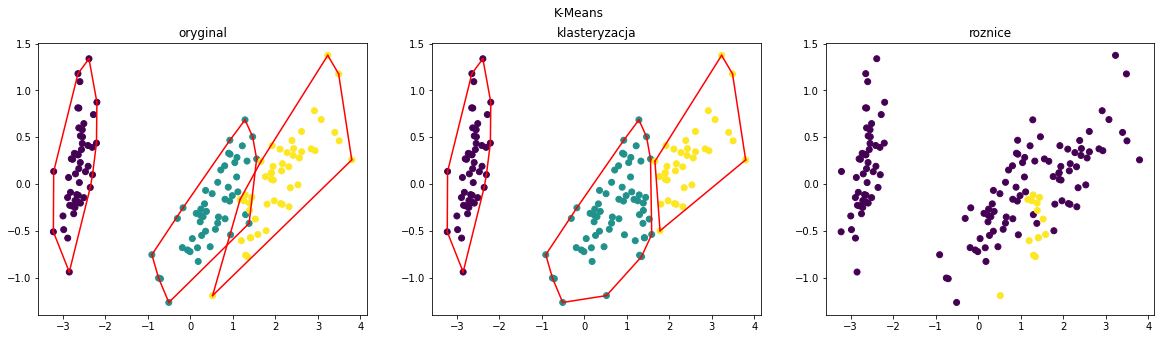

In [456]:
fig,ax=plt.subplots(1,3,figsize=(20,5))

fig.suptitle('K-Means')


ax[0].set_title('oryginal')
ax[0].scatter(X_r[:,0], X_r[:,1], c=Y)

for cluster in np.unique(Y):
    hull=ConvexHull(X_r[Y==cluster,:])
    for simplex in hull.simplices:
            ax[0].plot(hull.points[simplex, 0], hull.points[simplex, 1], 'r')


ax[1].set_title('klasteryzacja')
ax[1].scatter(X_r[:,0], X_r[:,1], c=average_Y)

for cluster in np.unique(average_Y):
    hull=ConvexHull(X_r[average_Y==cluster,:])
    for simplex in hull.simplices:
            ax[1].plot(hull.points[simplex, 0], hull.points[simplex, 1], 'r')

mask=np.not_equal(Y,average_Y)
ax[2].set_title('roznice')
ax[2].scatter(X_r[:,0], X_r[:,1], c=mask)

plt.show()

In [457]:
pca = PCA(n_components=3)
pca.fit(X)
X_r = pca.transform(X)

# 3D plot

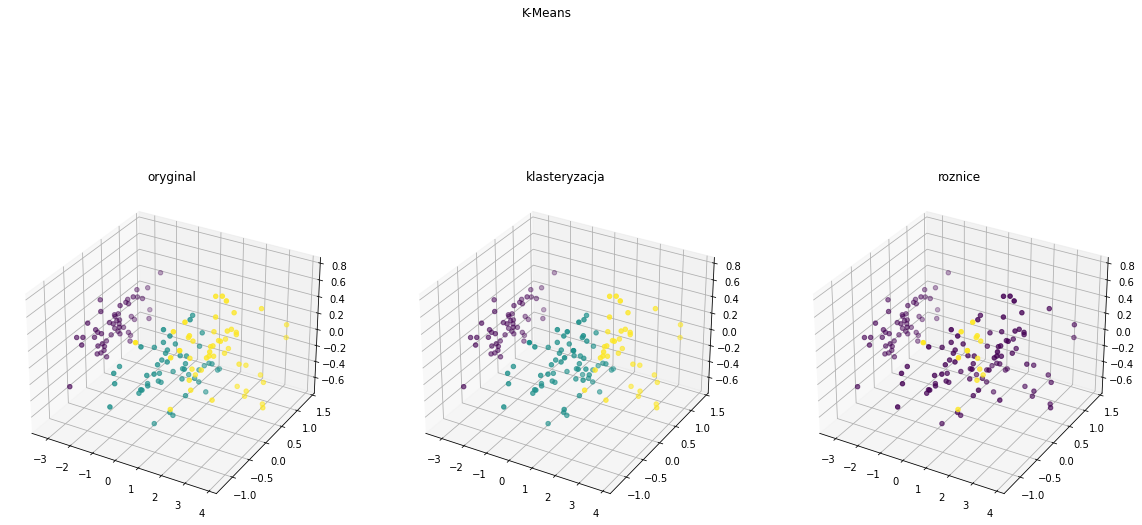

In [458]:
fig=plt.figure(figsize=(20,10))
ax=[fig.add_subplot(1,3,i+1,projection='3d') for i in range(3)]

fig.suptitle('K-Means')

ax[0].set_title('oryginal')
ax[0].scatter3D(X_r[:,0], X_r[:,1], X_r[:,2], c=Y)

ax[1].set_title('klasteryzacja')
ax[1].scatter3D(X_r[:,0], X_r[:,1], X_r[:,2], c=average_Y)

mask=np.not_equal(Y,average_Y)
ax[2].set_title('roznice')
ax[2].scatter3D(X_r[:,0], X_r[:,1], X_r[:,2], c=mask)

plt.show()

# dendogram

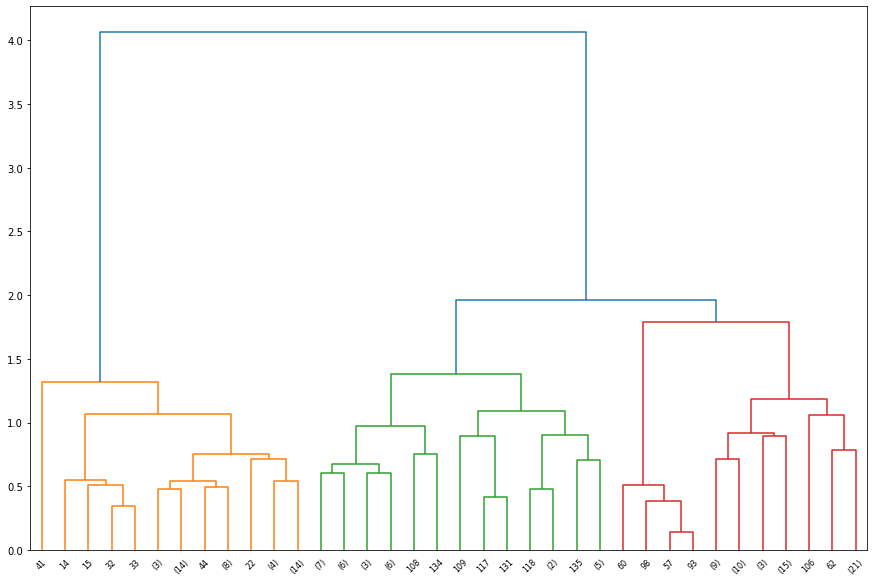

In [459]:
fig,ax=plt.subplots(1,1,figsize=(15,10))

Z = hierarchy.linkage(X, 'average')

dn = hierarchy.dendrogram(Z, truncate_mode='level', p=5, show_leaf_counts=True, color_threshold=0.45*max(Z[:,2]), ax=ax)

plt.show()

# Quantization

In [460]:
img=plt.imread('image1.jpg')
img2=img.reshape(img.shape[0]*img.shape[1],3)

# a

In [461]:
clustering = KMeans(n_init=1)


n_components=[2, 3, 5, 10, 30, 100]
images=[]

for i in range(len(n_components)):
    clustering.set_params(n_clusters=n_components[i])
    clustering.fit(img2)
    clustering.predict(img2)
    
    img_tmp=clustering.cluster_centers_[clustering.labels_,:].astype(int)
    
    images.append(img_tmp.reshape(img.shape))
    
    



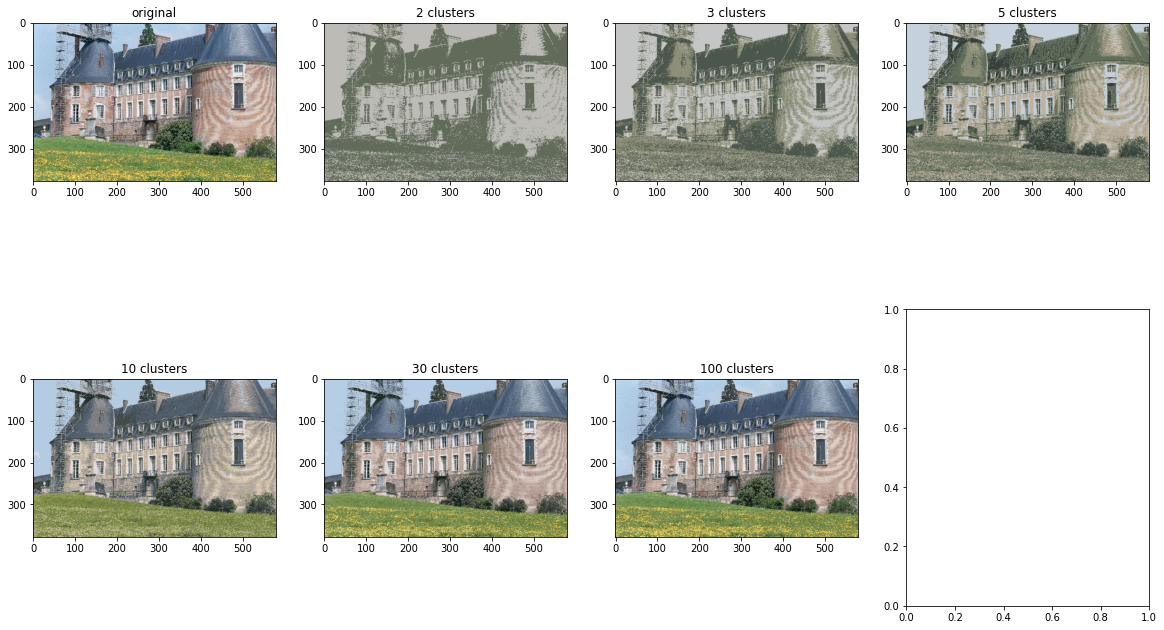

In [469]:
fig,ax=plt.subplots(2,4,figsize=(20,12))
ax=ax.ravel()

ax[0].set_title('original')
ax[0].imshow(img)


for i in range(len(n_components)):
    ax[i+1].set_title(f'{n_components[i]} clusters')
    ax[i+1].imshow(images[i])

plt.show()

# MSE

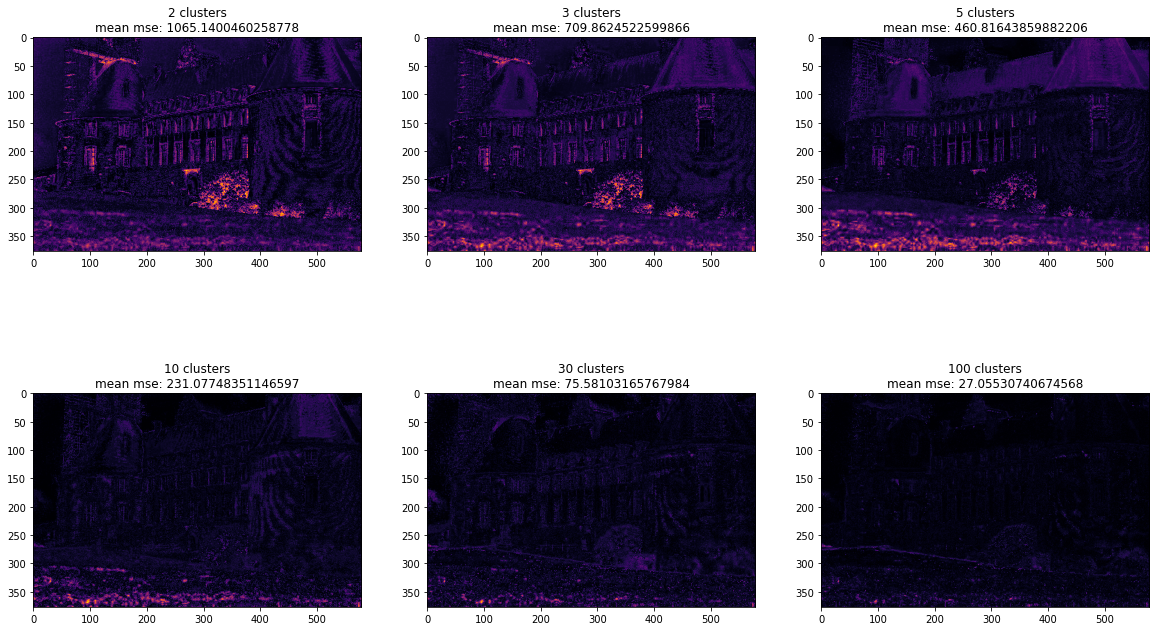

In [479]:
fig,ax=plt.subplots(2,3,figsize=(20,12))
ax=ax.ravel()

for i in range(len(n_components)):
    mse=(np.square(img - images[i])).mean(axis=2)
    
    ax[i].set_title(f'{n_components[i]} clusters\nmean mse: {mse.mean()}')
    ax[i].imshow(mse, cmap=plt.cm.inferno)
    
    
plt.show()